In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import glob
import matplotlib as mpl
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import os

In [4]:
filelist = glob.glob('./Resources/*.csv')
filelist

#for filename in glob.glob('./Resources/*.csv')

['./Resources\\April_2017.csv',
 './Resources\\August_2017.csv',
 './Resources\\December_2017.csv',
 './Resources\\February_2017.csv',
 './Resources\\January_2017.csv',
 './Resources\\July_2017.csv',
 './Resources\\June_2017.csv',
 './Resources\\March_2017.csv',
 './Resources\\May_2017.csv',
 './Resources\\November_2017.csv',
 './Resources\\October_2017.csv',
 './Resources\\September_2017.csv']

In [5]:
f = open(filelist[0])
columns = f.readline()
columns = columns.strip().split(',')
columns[0] = 'X'
f.close()

columns += ['MONTH', 'SEASON']

master_df = pd.DataFrame(columns = columns)

for filename in filelist:
    month_csv = pd.read_csv(filename)
    month_df = pd.DataFrame(month_csv)
    month_df['MONTH'] = filename.split('\\')[1][:-9]
    if "April" in filename or "March" in filename or "May" in filename:
        month_df["SEASON"] = "Spring"
    elif "January" in filename or "February" in filename or "December" in filename:
        month_df["SEASON"] = "Winter"
    elif "June" in filename or "July" in filename or "August" in filename:
        month_df["SEASON"] = "Summer"
    elif "September" in filename or "October" in filename or "November" in filename:
        month_df["SEASON"] = "Fall"
    else:
        month_df["SEASON"] = "Oh no!"
        
    master_df = pd.concat([master_df, month_df], axis=0)

In [6]:
master_df.count()

X                        1404052
Y                        1404052
OBJECTID                 1404052
ROWID_                    174954
DAY_OF_WEEK                    0
HOLIDAY                        0
WEEK_OF_YEAR                   0
MONTH_OF_YEAR                  0
ISSUE_TIME                     0
VIOLATION_CODE           1404052
VIOLATION_DESCRIPTION    1389544
LOCATION                 1404052
RP_PLATE_STATE           1393022
BODY_STYLE                173700
ADDRESS_ID               1404052
STREETSEGID              1398855
XCOORD                   1404052
YCOORD                   1404052
TICKET_ISSUE_DATE        1404052
MONTH                    1404052
SEASON                   1404052
dtype: int64

In [7]:
master_df.head()

,X,Y,OBJECTID,ROWID_,DAY_OF_WEEK,HOLIDAY,WEEK_OF_YEAR,MONTH_OF_YEAR,ISSUE_TIME,VIOLATION_CODE,...,LOCATION,RP_PLATE_STATE,BODY_STYLE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,MONTH,SEASON
0,-76.990896,38.892807,2750258,NaN,NaN,NaN,NaN,NaN,NaN,P050,...,1100 BLOCK PARK ST NE NORTH SIDE,VA,NaN,801357,1321.0,400790,136106,2017-04-24T08:36:00.000Z,April,Spring
1,-76.980569,38.888851,2750259,NaN,NaN,NaN,NaN,NaN,NaN,P002,...,SIDE OF 1700 A ST SE SOUTH SIDE,DC,NaN,57985,13169.0,401686,135667,2017-04-24T10:26:00.000Z,April,Spring
2,-76.980569,38.888851,2750260,NaN,NaN,NaN,NaN,NaN,NaN,P170,...,SIDE OF 1700 A ST SE SOUTH SIDE,DC,NaN,57985,13169.0,401686,135667,2017-04-24T10:28:00.000Z,April,Spring
3,-76.979301,38.888518,2750261,NaN,NaN,NaN,NaN,NaN,NaN,P303,...,FRONT OF 1753 A ST SE SOUTH SIDE,DC,NaN,56532,13169.0,401796,135630,2017-04-24T10:33:00.000Z,April,Spring
4,-76.981491,38.888680,2750262,NaN,NaN,NaN,NaN,NaN,NaN,P003,...,1700 BLOCK A ST SE NORTH SIDE,VA,NaN,802308,2993.0,401606,135648,2017-04-24T12:23:00.000Z,April,Spring


In [8]:
master_df = master_df.drop(["ROWID_", "DAY_OF_WEEK", "HOLIDAY", "WEEK_OF_YEAR", "MONTH_OF_YEAR", "ISSUE_TIME", "BODY_STYLE"], axis = 1)
master_df.head()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,MONTH,SEASON
0,-76.990896,38.892807,2750258,P050,PARKED WITHIN 25 FEET OF A STOP SIGN,1100 BLOCK PARK ST NE NORTH SIDE,VA,801357,1321.0,400790,136106,2017-04-24T08:36:00.000Z,April,Spring
1,-76.980569,38.888851,2750259,P002,STAND OR PARK IN ALLEY,SIDE OF 1700 A ST SE SOUTH SIDE,DC,57985,13169.0,401686,135667,2017-04-24T10:26:00.000Z,April,Spring
2,-76.980569,38.888851,2750260,P170,FAILURE TO DISPLAY CURRENT TAGS,SIDE OF 1700 A ST SE SOUTH SIDE,DC,57985,13169.0,401686,135667,2017-04-24T10:28:00.000Z,April,Spring
3,-76.979301,38.888518,2750261,P303,RESERVED RESIDENTIAL SPACE PERSONS W/ DISABILTIES,FRONT OF 1753 A ST SE SOUTH SIDE,DC,56532,13169.0,401796,135630,2017-04-24T10:33:00.000Z,April,Spring
4,-76.981491,38.888680,2750262,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,1700 BLOCK A ST SE NORTH SIDE,VA,802308,2993.0,401606,135648,2017-04-24T12:23:00.000Z,April,Spring


In [ ]:
master_df.to_csv("TicketsDF.csv")

In [9]:
with pd.option_context("display.max_rows", 10000):
   print(master_df["VIOLATION_DESCRIPTION"].value_counts())

FAIL TO DISPLAY A MULTISPACE METER RECEIPT            161265
PARK AT EXPIRED METER                                 144967
DISOBEYING OFFICIAL SIGN                               97544
RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT       96849
NO PARKING STREET CLEANING                             85162
NO STOPPING OR STANDING IN PM RUSH HOUR ZONE           67802
FAILURE TO DISPLAY CURRENT TAGS                        67126
NO PARKING ANYTIME                                     52995
UNAUTHORIZED VEHICLE IN LOADING ZONE                   42734
FAILURE TO SECURE DC TAGS                              42728
NO STANDING ANYTIME                                    37537
PARK OVERTIME AT A METER                               34460
NO STOPPING OR STANDING IN AM RUSH HOUR ZONE           32328
NO FRONT TAGS.                                         28991
PARKED WITHIN 25 FEET OF A STOP SIGN                   25514
EXPIRATION TIME ON METER RECEIPT LAPSED                23811
STAND OR PARK IN ALLEY  

In [10]:
len(master_df["VIOLATION_CODE"].value_counts())

243

In [11]:
len(master_df["VIOLATION_DESCRIPTION"].value_counts())

238

In [12]:
with pd.option_context("display.max_rows", 1000):
   print(master_df["VIOLATION_CODE"].value_counts())

P281       161265
P039       144967
P012        97544
P003        96849
P173        85162
P259        67802
P170        67126
P055        52995
P031        42734
P172        42728
P269        37537
P037        34460
P159        32328
P168        28991
P050        25514
P280        23811
P002        22323
P013        21082
P386        20879
P322        20304
P007        19642
P344        16759
P113        16590
P365        15667
P076        14250
P112        14169
P020        13518
P363        12650
P014        11885
P199        10407
P057         9802
P034         9596
P001         9422
P304         6880
P271         6545
P036         6331
P169         5974
P270         4897
P010         4594
P035         4567
P042         4424
P385         3941
P025         3873
P024         3811
P430         3305
P046         3295
P029         2582
P314         2363
P111         2269
P307         2129
P303         2072
P054         2052
P302         1538
P045         1465
P216         1419
P047      

In [13]:
violations_df = master_df["VIOLATION_DESCRIPTION"].value_counts()
descriptions = master_df["VIOLATION_DESCRIPTION"].unique()
descriptions

array(['PARKED WITHIN 25 FEET OF A STOP SIGN', 'STAND OR PARK IN ALLEY',
       'FAILURE TO DISPLAY CURRENT TAGS',
       'RESERVED RESIDENTIAL SPACE PERSONS W/ DISABILTIES',
       'RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT',
       'UNAUTHORIZED VEHICLE IN LOADING ZONE', 'DISOBEYING OFFICIAL SIGN',
       'NO STOPPING OR STANDING IN AM RUSH HOUR ZONE', 'RELOCATE TOW FEE',
       'NO PARKING STREET CLEANING',
       'NO STOPPING OR STANDING IN PM RUSH HOUR ZONE',
       'PARK ON SIDEWALK OR AREA RESERVED FOR PEDESTRIANS',
       'PARK ON PUBLIC SPACE', 'PARK IN A BUS ZONE',
       'EMERGENCY NO PARKING', 'NO PARKING ANYTIME',
       'NO STANDING ANYTIME',
       'FAIL TO DISPLAY A MULTISPACE METER RECEIPT',
       'PARK OVERTIME AT A METER', 'PARK OVERTIME IN TIMED ZONE',
       'STREETCAR-PARK, STOP  STAND VEH  GUIDEWAY/PLATFORM',
       'NO REAR TAGS.', 'NO FRONT TAGS.',
       'PARK IN RESERVED SPACE FOR MOTORCYCLES ONLY',
       'PARKED IN DRIVEWAY OR ALLEY TO OBSTRUCT SIDE

In [14]:
viol_df = pd.DataFrame({"Number of Violations":violations_df})
viol = viol_df[["Number of Violations"]]
viols = viol.sort_values(['Number of Violations'], ascending=True)
violation_ten = viols.head(33)
violation_ten.head()

,Number of Violations
TAXICAB FAIL TO SHOW ID,1
NO OR DISCONNECTED MUFFLER,1
PARK IN A GUTTER,1
TAXICAB NO MANIFEST,1
INCORRECT BUMPER ON A VENDING VEHICLE,1


In [21]:
thisone = master_df.groupby('VIOLATION_DESCRIPTION')["VIOLATION_CODE"].count().reset_index()
descriptions_df = thisone.sort_values(['VIOLATION_CODE'], ascending=True)
description_df = descriptions_df.head(33)
description_df.head(33)

,VIOLATION_DESCRIPTION,VIOLATION_CODE
85,MOVING A LOAD OVER EIGHT FEET WIDE,1
20,DRIVE TRUCK ON RESTRICTED ROUTE,1
176,PROVIDE FALSE INFO TO OBTAIN TEMP PARKING PLACARD,1
177,PROVIDE FALSE INFO TO OBTAIN VISITOR PARKING PERM,1
211,TAXICAB NOT USING OFF DUTY SIGN,1
210,TAXICAB NO MANIFEST,1
25,EXCESSIVE SMOKE.,1
47,FAIL TO PROPERLY DISPLAY INSPECTION STICKER SIGN,1
74,LOAD EXTENDS OVER FENDER,1
206,TAXICAB FAIL TO UPDATE CHANGE OF ADDRESS,1


In [16]:
# Create Dataframe of unique violation descriptions
descdata = thisone["VIOLATION_DESCRIPTION"].unique()

In [17]:
sentiments = []
for des in descdata:
        results = analyzer.polarity_scores(des)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        print(des)
        print("Compound Score: ", compound)
        print("Positive Score: ", pos)
        print("Neutral Score: ", neu)
        print("Negative Score: ", neg)
        sentiments.append({"Violation Description": des, "Compound": compound, "Positive": pos, 
                           "Negative": neg, "Neutral": neu})

ABANDON VEH PRIV/PUBLIC PROP SOLID WASTE/RAT
Compound Score:  -0.3182
Positive Score:  0.188
Neutral Score:  0.471
Negative Score:  0.341
ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 1
Compound Score:  -0.4404
Positive Score:  0.0
Neutral Score:  0.633
Negative Score:  0.367
ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 2
Compound Score:  -0.4404
Positive Score:  0.0
Neutral Score:  0.633
Negative Score:  0.367
ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 3
Compound Score:  -0.4404
Positive Score:  0.0
Neutral Score:  0.633
Negative Score:  0.367
BUS LANE, UNAUTHORIZED VEHICLE PARKED IN
Compound Score:  0.0
Positive Score:  0.0
Neutral Score:  1.0
Negative Score:  0.0
CMV- NON LOAD ZONE  METER SPACE PROHIBITED  TIMES
Compound Score:  0.0
Positive Score:  0.0
Neutral Score:  1.0
Negative Score:  0.0
COMM VEH MORE THAN 22 FEET IN FRONT OF RESIDENCE
Compound Score:  0.0
Positive Score:  0.0
Neutral Score:  1.0
Negative Score:  0.0
COMMERCIAL MOTOR VEHICLE - NOT OUT OF SERVICE
Comp

Negative Score:  0.25
RPP BEYOND 2 HOUR PERIOD W/O VALID PERMIT BE
Compound Score:  0.0
Positive Score:  0.0
Neutral Score:  1.0
Negative Score:  0.0
RPP BEYOND 2 HOUR PERIOD W/O VALID PERMIT BZ
Compound Score:  0.1027
Positive Score:  0.167
Neutral Score:  0.833
Negative Score:  0.0
RPP FAIL TO PROPERLY DISPLAY CURRENT STICKER  BZ
Compound Score:  -0.4767
Positive Score:  0.128
Neutral Score:  0.55
Negative Score:  0.321
RPP FAIL TO REMOVE EXPIRED STICKER BALL PARK ZONE
Compound Score:  -0.5423
Positive Score:  0.0
Neutral Score:  0.696
Negative Score:  0.304
RPP FAIL TO REMOVE EXPIRED STICKER BALLPARK EVENTS
Compound Score:  -0.5423
Positive Score:  0.0
Neutral Score:  0.667
Negative Score:  0.333
SPILLED LOAD FROM COMMERCIAL VEHICLE
Compound Score:  0.0
Positive Score:  0.0
Neutral Score:  1.0
Negative Score:  0.0
STAND OR PARK IN ALLEY
Compound Score:  0.0
Positive Score:  0.0
Neutral Score:  1.0
Negative Score:  0.0
STOPPING, STANDING OR PARKING VEHICLE IN BIKE LANE
Compound Score

In [18]:
sentiment_results = pd.DataFrame.from_dict(sentiments)
sent_df = sentiment_results[['Violation Description', 'Compound', 'Positive', 'Neutral', 'Negative']]
sent_df.head()

,Violation Description,Compound,Positive,Neutral,Negative
0,ABANDON VEH PRIV/PUBLIC PROP SOLID WASTE/RAT,-0.3182,0.188,0.471,0.341
1,ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 1,-0.4404,0.000,0.633,0.367
2,ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 2,-0.4404,0.000,0.633,0.367
3,ABANDON VEHICLE ON PUBLIC/PRIVATE PROPERTY VIOL 3,-0.4404,0.000,0.633,0.367
4,"BUS LANE, UNAUTHORIZED VEHICLE PARKED IN",0.0000,0.000,1.000,0.000


In [19]:
mpl.rcParams['font.size'] = 45

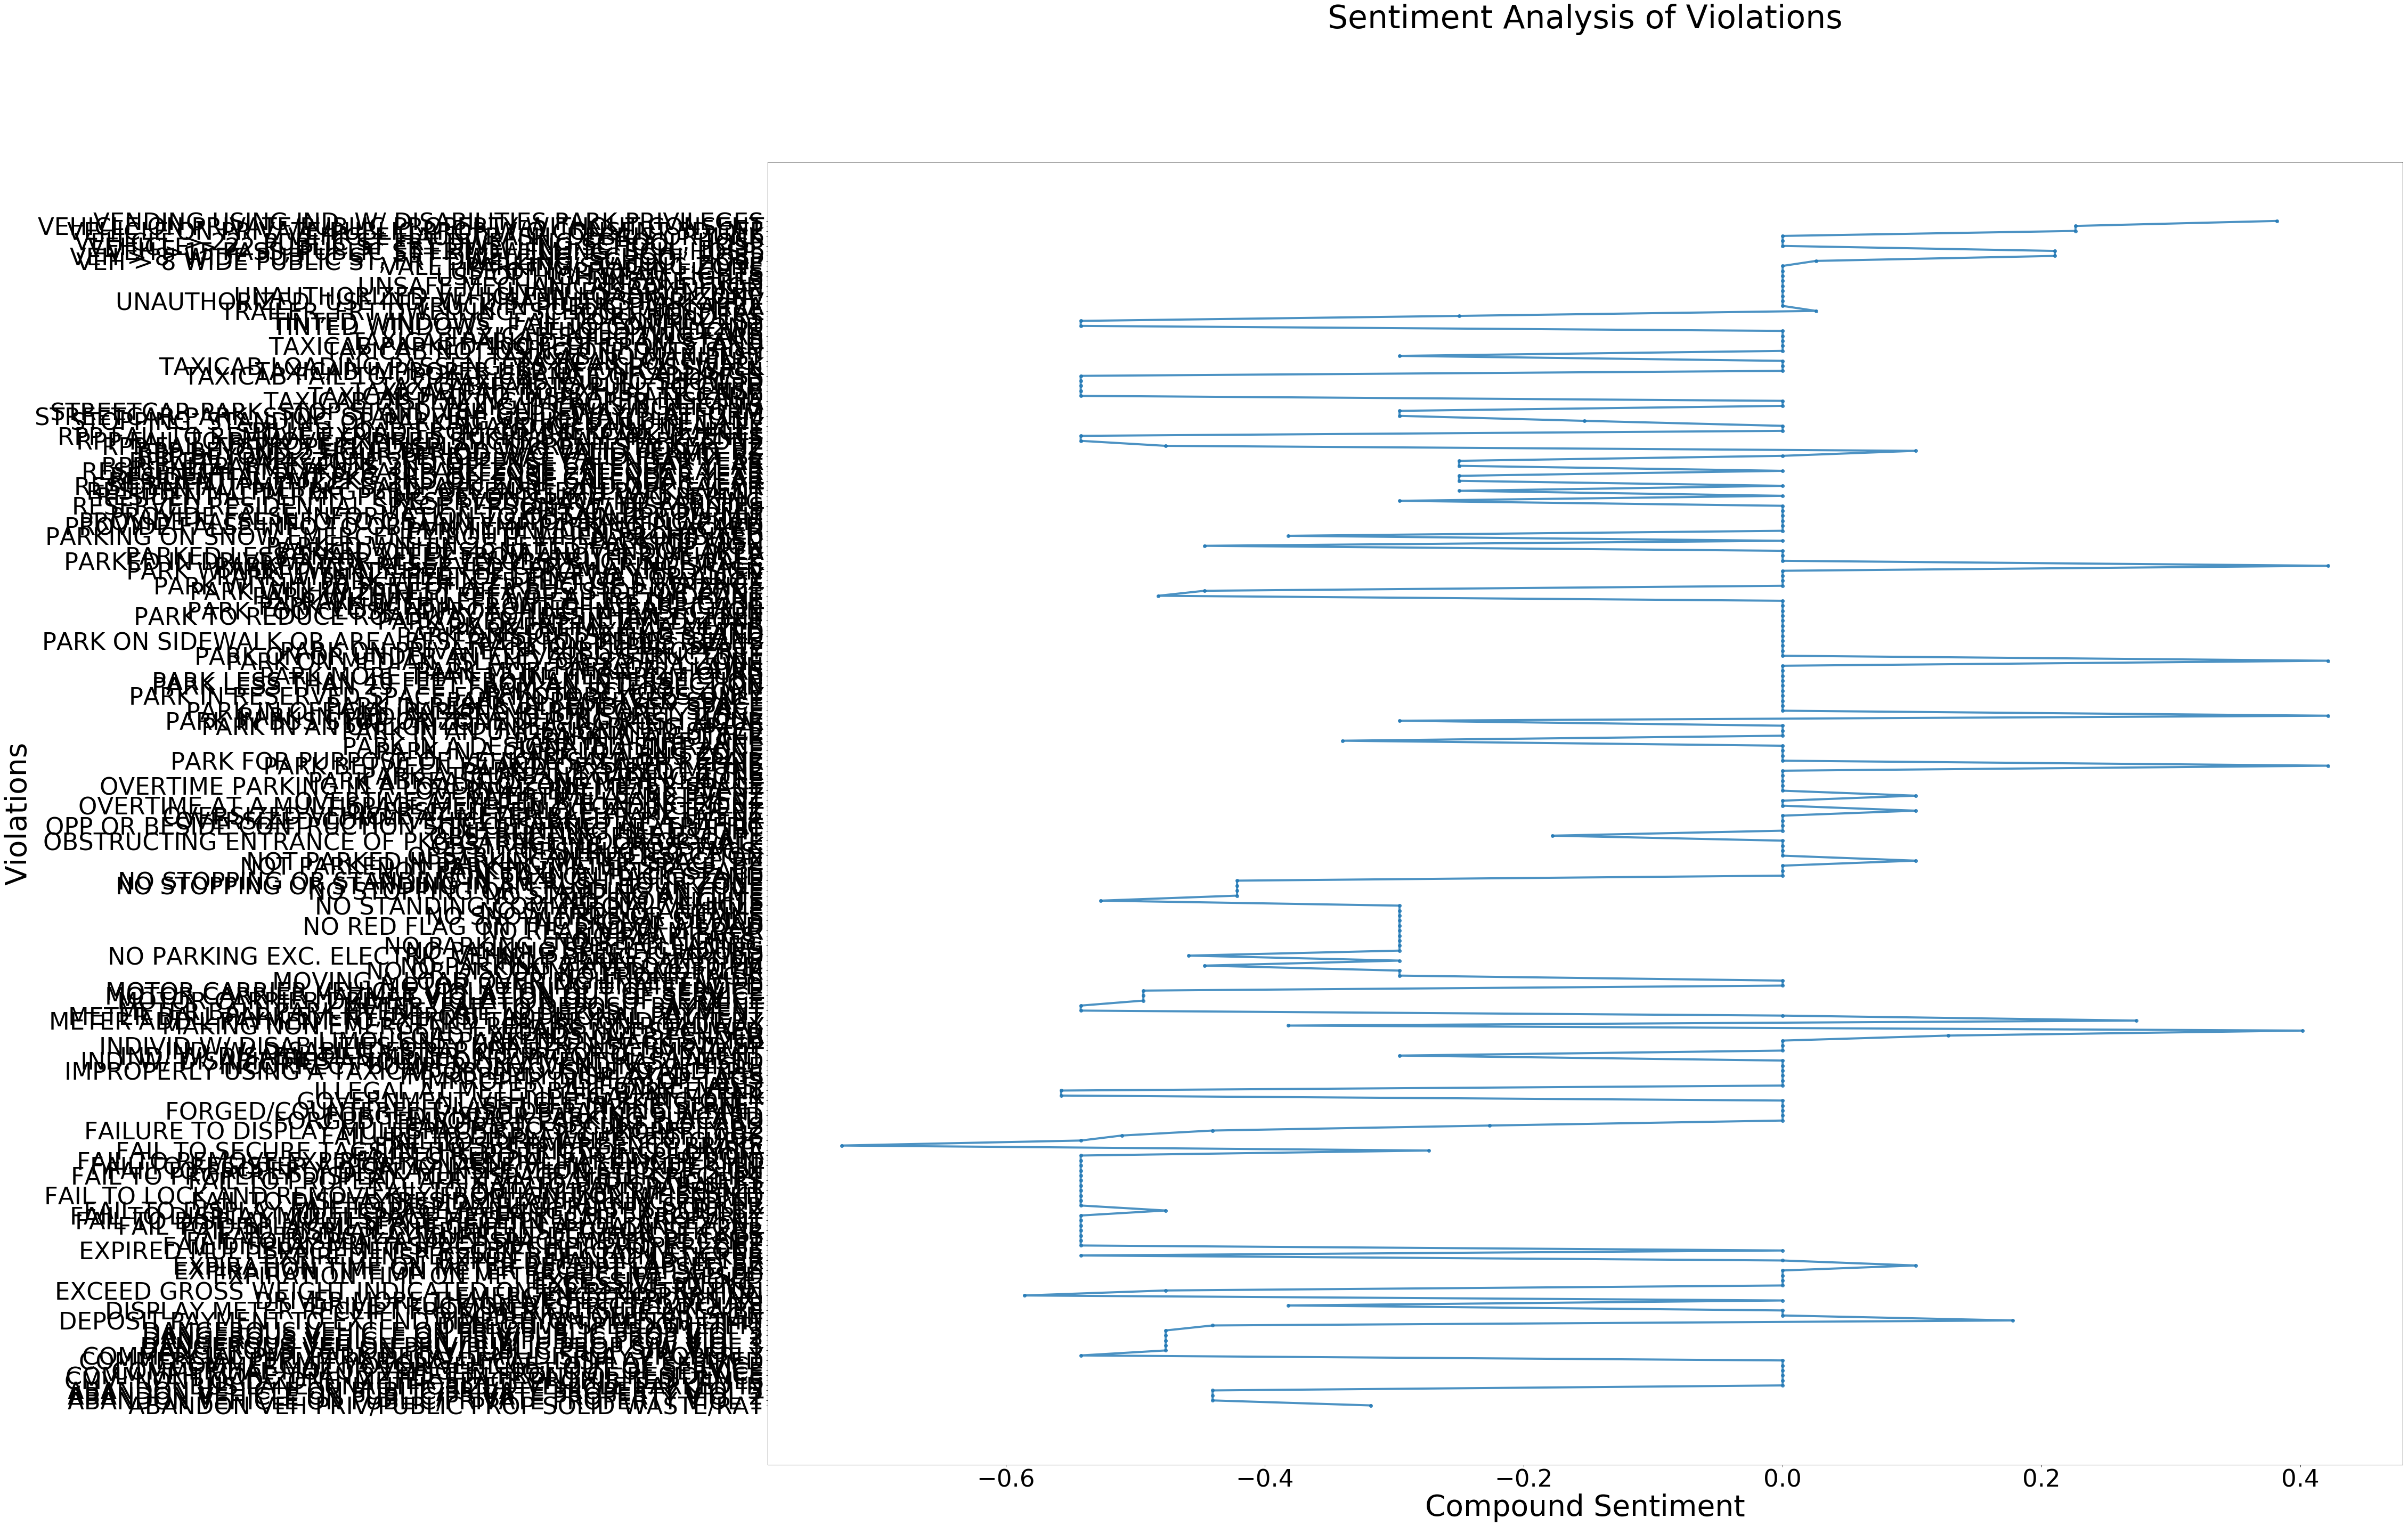

In [20]:
plt.figure(figsize=(55,45))
x_vals = sent_df["Compound"]
y_vals = sent_df["Violation Description"]
plt.plot(x_vals, y_vals, marker="o", linewidth=4, alpha=0.8)
plt.title("Sentiment Analysis of Violations", fontsize = 60, y=1.1)
plt.ylabel("Violations", fontsize = 55)
plt.xlabel("Compound Sentiment", fontsize = 55)
plt.savefig("Sentiment.png")
plt.show()

In [22]:
ten_odd = ["PARK WITH LEFT WHEEL TO CURB", "FAIL TO TURN WHEEL TO CURB", "COMMERCIAL VEHICLE - NOT OUT OF SERVICE", 
           "COMMERCIAL VEHICLE - OUT OF SERVICE", "UNNECESSARY NOISE", "PARK TO REDUCE ROADWAY TO LESS THAN 10 FEET", 
           "FAIL TO LOCK AND REMOVE KEY FROM IGNITION WHEN PKD", "PARK IN GUTTER", "PARK IN AN UNLIGHTED AREA (PARKING AREA)", 
           "FAILURE TO SECURE DC TAGS"]
odd_counts = [2582, 28, 532, 311, 1, 225, 26, 1, 21, 42728]
y_axis = np.arange(len(odd_counts))

In [23]:
mpl.rcParams['font.size'] = 60

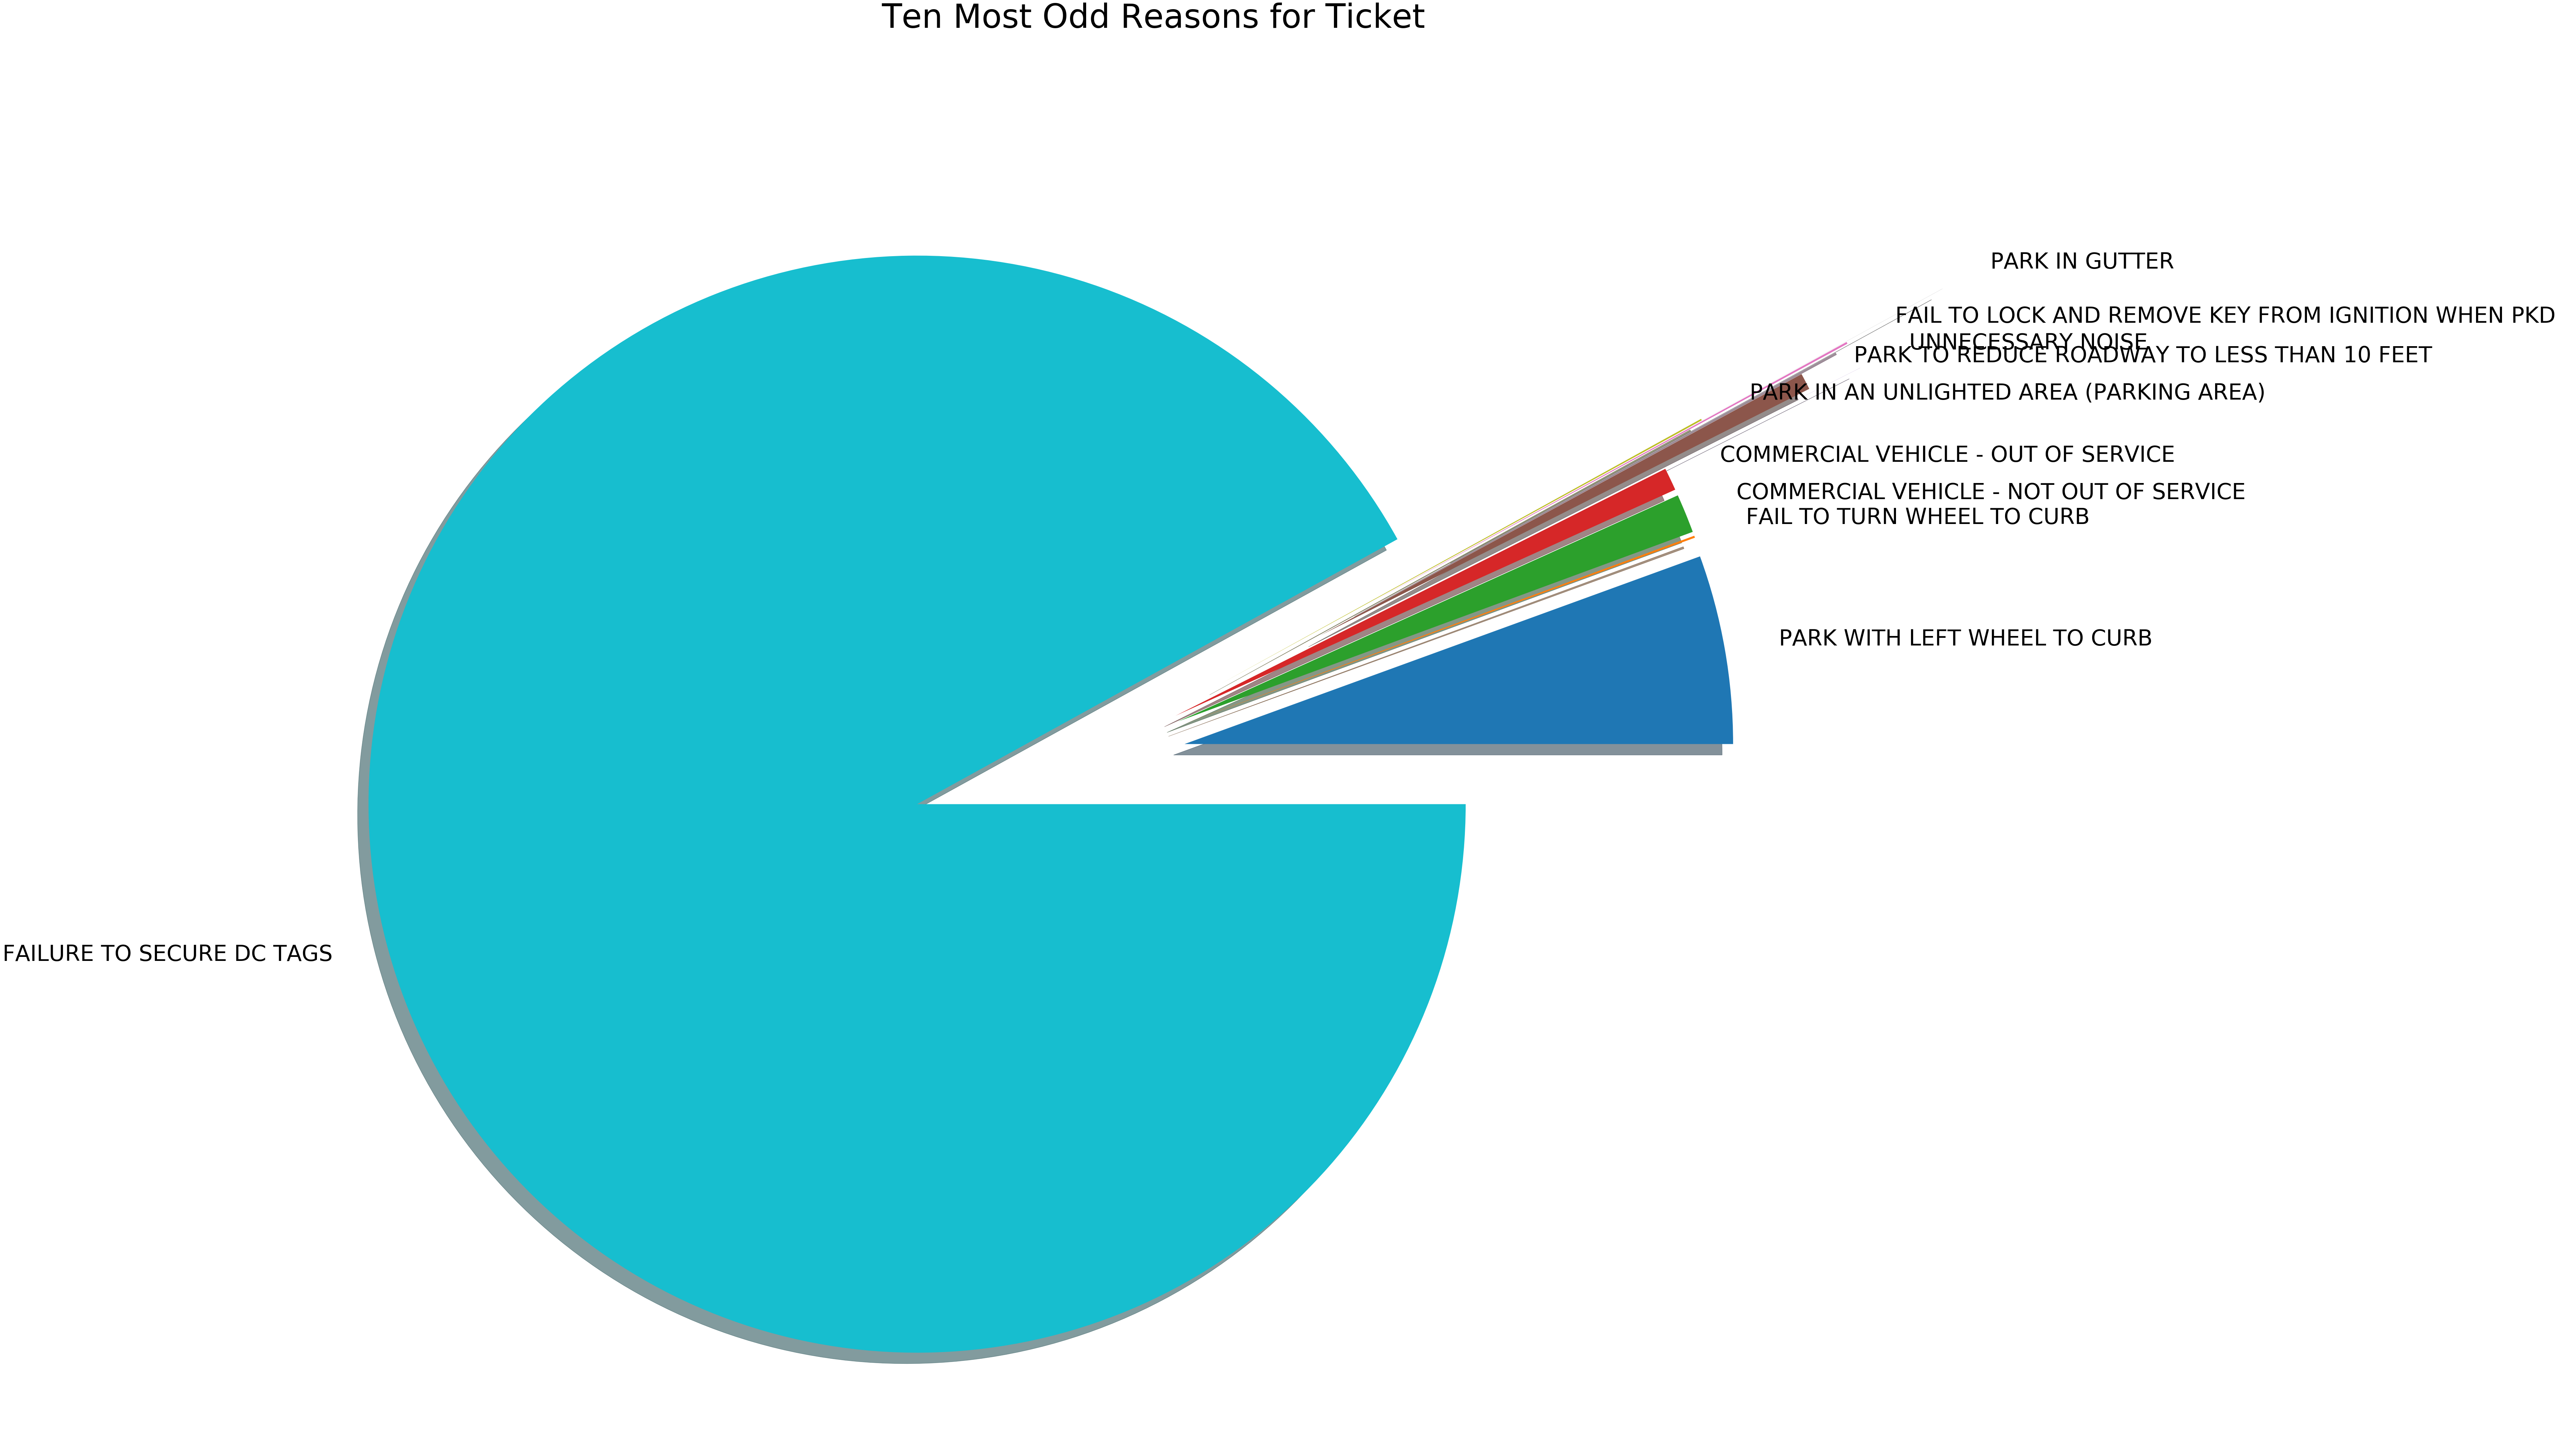

In [28]:
fig1, ax1 = plt.subplots(figsize=(85,65))
plt.pie(odd_counts, labels = ten_odd, explode = (0.2, 0.2, 0.2, 0.2, 0.6, 0.5, 0.6, 0.8, 0.3, 0.3), shadow=True)
plt.axis("equal")
plt.title('Ten Most Odd Reasons for Ticket', fontsize = 90, y=1.1)
plt.savefig("Odd.png")
plt.show()